In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import norm
import scipy.stats as stats
import statsmodels.api as sm
import pylab
from scipy.stats import normaltest


100%|██████████| 50000/50000 [00:01<00:00, 46079.77it/s]


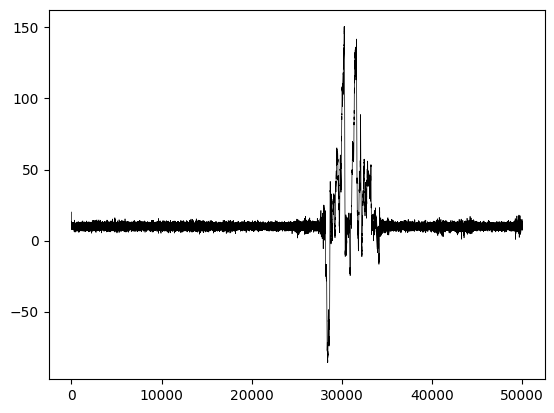

In [5]:
p = 10
b= 1

def last_mean(list,M):
    if len(list) > M :
        return np.mean([ e for e in list[-M:]])
    else:
        return np.mean(list)


        
def p_1(it,b,sigma,M):
    price = [10]
    for i in range(it):
        new_price = price[-1] + b/(M-1)*(price[-1]-last_mean(price,M)) + sigma*np.random.normal(0, 1)
        price.append(new_price)
    return price

"""price = p_1(1000,-1,0.2,20)
plt.plot(price, label = "b=-1", color = "blue")
price = p_1(1000,0,0.2,20)
plt.plot(price, label = "b=0", color = "green")
price = p_1(1000,1,0.2,20)
plt.plot(price, label = "b=1", color = "red")
plt.legend()
plt.show()"""



N = 100 # Nombre d'agents

def step(k, N, sig, h):
    # On choisit aléatoirement deux fourmis fst et snd 
    fst, snd = np.random.choice(N,2, replace=False) 
    
    spont = np.random.choice([False, True], p=[1-sig, sig])
    inter = np.random.choice([False, True], p=[1-h, h])
    
    if spont:
        if fst<k:
            return (k-1)
        else:
            return (k+1)
    elif inter:
        if fst<k and snd<k or fst>=k and snd>=k:
            return k
        elif fst<k and snd>=k:
            return (k-1)
        elif fst>=k and snd<k:
            return (k+1)
    else:
        return k
    
    
def dyn(it, k_init, N, sig, h): # it représente le nombre total d'itération
    zone1 = [k_init]
    for st in range(it-1):
        zone1.append(step(zone1[-1], N, sig, h))
    return [ e/N for e in zone1]

#Mouvement de prix selon l'équation 10
def price_dyn(it, k_init, N, sig, h , M, sig_noise):
    
    frac_fonda = dyn(it,k_init, N, sig, h)
    price = [20]
    price_fonda = 10
    returns = []
    count = 0

    for i in tqdm(range(it)):
        pf = frac_fonda[i]
        pc = 1- pf

        return_t = pf*1.5*(price_fonda - price[-1]) + pc*1.5*(price[-1] - last_mean(price, M))/(M-1) + sig_noise*np.random.normal(0, 1)
        
        p_t = price[-1] + return_t

        returns.append(return_t)
        price.append(p_t)
        
    
    return price,returns,frac_fonda,count


#plot de la figure de prix 
price,returns,frac_fonda,count = price_dyn(50000, 50, 100, 0.002, 0.99, 50, 1.2)
plt.plot(price, label = "b=0", color = "black", linewidth = 0.5)



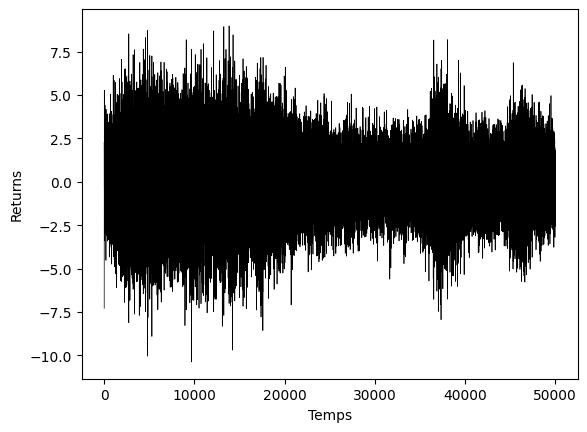

In [6]:
#Plot des returns
plt.plot(returns, label = "b=0", color = "black", linewidth = 0.5)
plt.xlabel('Temps')
plt.ylabel('Returns')

nbr_fonda = [p*100 for p in frac_fonda]

Text(0, 0.5, 'Prix')

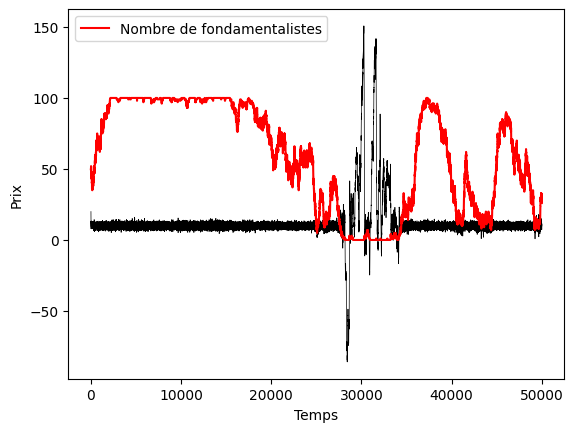

In [7]:
#Plot du prix avec le nombre de fondamentalistes superposé
plt.plot(price, color = "black", linewidth = 0.5)
plt.plot(nbr_fonda, color = "red", label = "Nombre de fondamentalistes")
plt.legend()
plt.xlabel('Temps')
plt.ylabel('Prix')

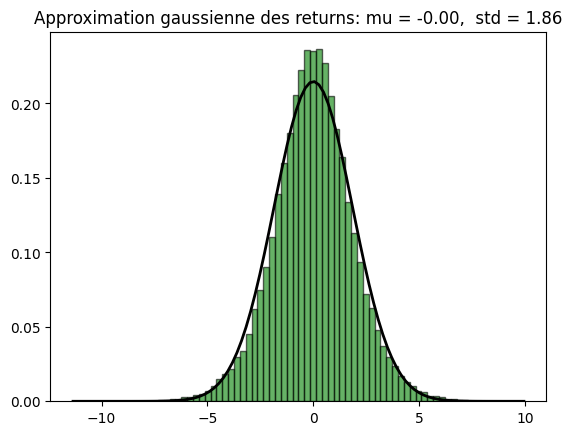

In [8]:
#Première visualisation des returns 

mu, std = norm.fit(returns)

# Plot the histogram.
plt.hist(returns, bins=70, density=True, alpha=0.6, color='g', ec = 'black')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Approximation gaussienne des returns: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

#plt.xlim(3,7)

plt.show()

In [9]:
#Test de normalité 
k, p = normaltest(returns, axis=0, nan_policy='propagate')
p

1.9607899576928753e-154

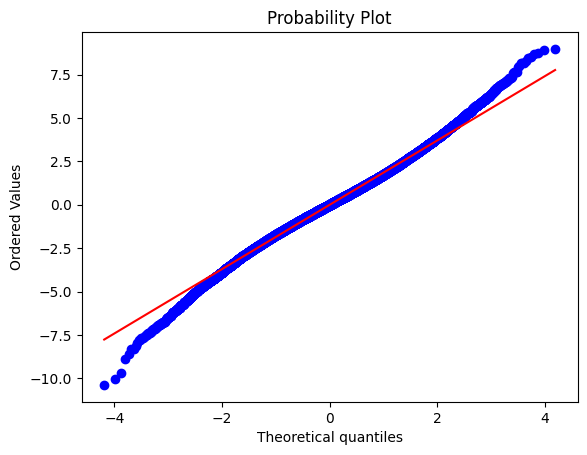

In [10]:
#QQ plot pour voir où est ce que la distribution n'est pas normale
stats.probplot(returns, dist = "norm", plot = pylab)
pylab.show()

(-15.0, 15.0)

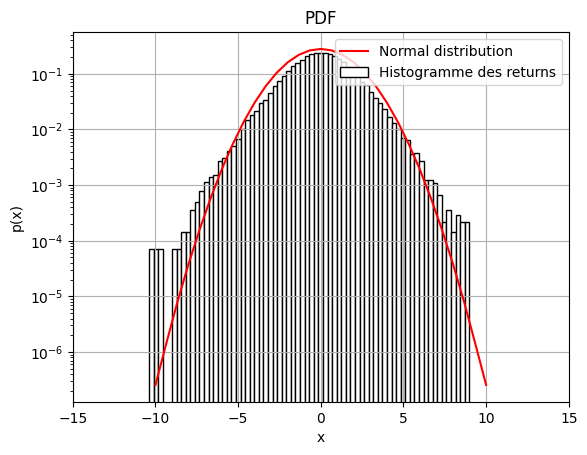

In [13]:
#Plot des queues épaisses 


# Normal distribution density
sample1 = np.random.normal(mu,std, size = 500000000)
slots1 = np.linspace(-10,10,31)
digitized_sample1 = np.digitize(sample1, slots1)
Density1 = np.array([np.count_nonzero(digitized_sample1 == i)/len(digitized_sample1) for i in range(len(slots1))])
Density1 = Density1
plt.plot(slots1,Density1+ Density1[::-1], label = r"Normal distribution", color = 'red')


# Pareto distribution density
sample2 = np.array(returns)
slots2 = np.linspace(-10,10,21)
digitized_sample2 = np.digitize(sample2,slots2)
Density2 = np.array([ np.count_nonzero(digitized_sample2 == i) for i in range(len(slots2))])
Density2 = Density2

#plt.plot(slots2,Density2,label = r"Distribution des returns")
plt.hist(returns, bins = 70, density = True, ec = "black", color = 'w', label = "Histogramme des returns")
plt.title('PDF')
plt.grid()
plt.xlabel('x')
plt.ylabel('p(x)')
plt.yscale('log')
plt.legend()
plt.xlim(-15,15)

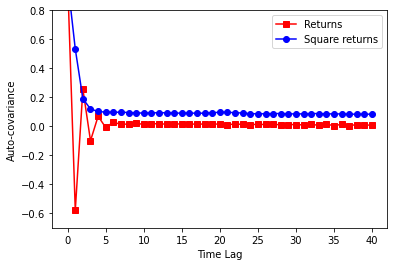

In [ ]:
#Plot des autocorrélations des returns
plt.plot(returns_acf, color = 'r', marker = 's', label = 'Returns')
plt.plot(square_returns_acf, color  = 'b', marker='o', label = 'Square returns')
plt.ylim(-0.7,0.8)
plt.legend()
plt.ylabel("Auto-covariance")
plt.xlabel('Time Lag')
plt.show()